### Quantum Circuit Simulator - Created by Jack 02/03/2023 - Updated 12/03/2023 - Updated 20/03/2023
### THIS LIBRARY IS FOR VISUALISATION/PRESENTATION/TESTING, NOT FOR "PUBLIC" CONSUMPTION.
### SEE MAIN.py OR MAIN.ipynb FOR A CLEARER DEPICTION OF THE PROGRAM

In [1]:
import import_ipynb
import numpy as np
import math
import matplotlib.pyplot as plt
import gates as gate
import register as reg
import plots
from grover import grover 
import Shor
import random
plt.style.use('dark_background')

importing Jupyter notebook from gates.ipynb
importing Jupyter notebook from register.ipynb
importing Jupyter notebook from plots.ipynb
importing Jupyter notebook from grover.ipynb
importing Jupyter notebook from Shor.ipynb


**GROVER'S**  
To test Grover's algorithm, use the function "grover". All you need is to specify the number of qubits you would like to simulate. If you have a search preference, include it as an additional paramater, otherwise it will default to the middle indices.    

In [2]:
qubit_count = 6
span = (1<<qubit_count)
key_value = int(span/2)
#circuit_end, track = grover(qubit_count,key_value)
circuit_end, track,key_value, span = grover(qubit_count,key_value,track=True,wordsearch=True)

Enter text  enter the text to check here
What word do you want to search for?  to


Position(s): [3]


The following is really only designed for numerical search, doesn't do great with word search.

(-0.5, 8.0, 0.0, 1.0)

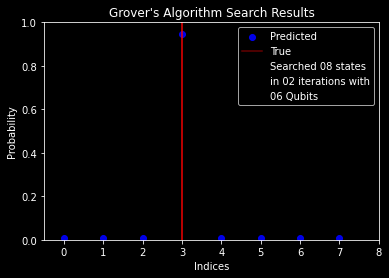

In [3]:
plt.title("Grover's Algorithm Search Results")
plt.scatter(range(span), np.absolute(circuit_end.var)**2, color='b',alpha=.9,label="Predicted")
if isinstance(key_value, int)==True:
    plt.axvline(key_value,c='r',alpha=.4, label="True")
else:
    for i in range(len(key_value)):
        plt.axvline(key_value[i],c='r',alpha=.8)
        if i==len(key_value)-1:
            plt.axvline(key_value[i],c='r',alpha=.4, label="True")
plt.ylabel("Probability")
plt.xlabel("Indices")
plt.plot([], [], ' ', label='Searched %.2d states' %span)
plt.plot([], [], ' ', label='in %.2d iterations with' %int(np.pi*np.sqrt(span)/4.0))
plt.plot([], [], ' ', label='%.2d Qubits' %(qubit_count))
plt.legend()
plt.axis([-.5,circuit_end.size,0,1.0])#min(np.absolute(circuit_end.var)),1.0])

In [4]:
print("probabilities","basis")
for i in range(circuit_end.size):
    if circuit_end.var[i]**2==max(circuit_end.var**2):
        print(np.round(np.absolute(circuit_end.var[i])**2,8),'    |',i,'>','<------ Prediction')
    else:
        print(np.round(np.absolute(circuit_end.var[i])**2,8),'    |',i,'>')

probabilities basis
0.0078125     | 0 >
0.0078125     | 1 >
0.0078125     | 2 >
0.9453125     | 3 > <------ Prediction
0.0078125     | 4 >
0.0078125     | 5 >
0.0078125     | 6 >
0.0078125     | 7 >


**SHORS**

In [8]:
# Applied Shor Algorithm in RSA Decryption
Shor.Shor_Demonstration()

 RSA DECRYPTION
----ENCODING----
N = 15, the product of primes 5 and 3
Padded Message 'm' = 14
Public exponent 'e' = 5
m**e mod N = cipher 'c' = 14
----DECODING-----
Factors w/Shor =  5 3
Private Exponent 'd' =  5
c**d mod N = m mod N
----TESTING----
Decoded Message =  14


In [9]:
# Shor Algorithm with steps
Shor.algorithm(21)

Count: 1
x = 13
Multiple = 256
r = 2
Factors of 21 : 7 3
 


### **PLOTTING STUFF. DARE NOT TRAVEL PAST HERE.**

Text(0.5, 0, 'Exponent')

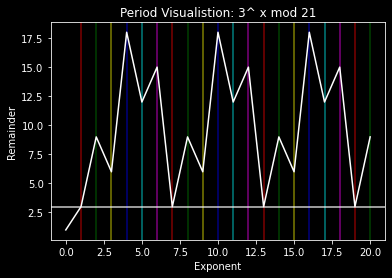

In [8]:
dist = 21
m = 3
rem = []
for x in range(0,dist):
    rem.append(m**x % dist)
plt.title("Period Visualistion: " + str(m) + "^ x mod " + str(dist))
c=1
col = ['red','green','yellow','blue','cyan','magenta','darkorange']
for i in range(1,dist):
    if c > 6:
        c=1
    plt.axvline(i,c=col[c-1],alpha=.5)#,alpha=(.7*1/c))
    c+=1
plt.axhline(rem[1],c='w',alpha=.8)
plt.plot(rem,c='w')
plt.ylabel("Remainder")
plt.xlabel("Exponent")

Text(0.5, 0, 'Exponent')

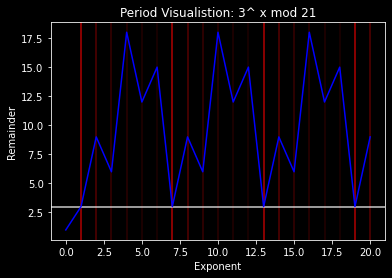

In [9]:
plt.title("Period Visualistion: " + str(m) + "^ x mod " + str(dist))
c=1
for i in range(1,dist):
    if c > 6:
        c=1
    plt.axvline(i,c='r',alpha=(.7*1/c))
    c+=1
plt.axhline(rem[1],c='w',alpha=.8)
plt.plot(rem,c='b')
plt.ylabel("Remainder")
plt.xlabel("Exponent")

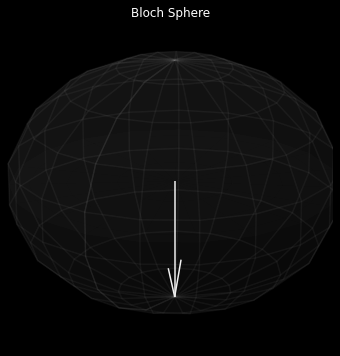

In [7]:
# Messing with a Bloch Sphere.
from mpl_toolkits.mplot3d import Axes3D
vec = [0,0,-1]
origin = [0,0,0]
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0,0,0,vec[0],vec[1],vec[2])
ax.set_title("Bloch Sphere")
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="w",alpha=.05)
ax.plot_surface(x, y, z, color="w",alpha=.05)
ax.plot_surface(x,y,u*0, color="w",alpha=.01)
ax.set_axis_off()
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_zlim([-1.5,1.5])
ax.view_init(elev=20, azim=30)
ax.dist = 4

In [66]:
r = 1
l = np.linspace(0,2*np.pi,1000)
cat=np.zeros(1000)
cat2=np.zeros(1000)
for i in range(len(l)):
    cat[i] = r*np.sin(l[i])
    cat2[i]=r*np.cos(l[i])

In [220]:
movement=track[:,key_value]
basis=track[:,0]

In [221]:
vs = []; us=[]
for i in range(len(basis)):
    v=movement[i]
    u=np.sqrt(1-v**2)
    vs.append(v)
    us.append(u)

In [255]:
for i in range(len(basis)):
    plt.figure(figsize=(6,6))
    v=movement[i]
    u=np.sqrt(1-v**2)
    vb=basis[i]
    ub=np.sqrt(1-vb**2)
    plt.scatter(cat,cat2,c='w',alpha=.05,s=1)
    vs.append(v)
    us.append(u)
    plt.plot([], [], ' ', label='Amplitudes')
    plt.quiver(x, y, u, v, color='lime', units='xy', scale=1,width=.01,label="Oracle Basis")
    plt.quiver(x, y, ub, vb, color='yellow', units='xy', alpha=.6,scale=1,width=.01,label="Superpositioned")
    if i>0:
        for j in range(i):
            plt.quiver(x, y, us[j], vs[j], color='green',alpha=.3, units='xy', scale=1,width=.01,ls='dashed')
    plt.quiver(x, y, u1, v0, color='w', alpha=.15,units='xy', scale=1,width=.01,headlength=0)
    plt.quiver(x, y, u0, v1, color='r',alpha=.6, units='xy', scale=1,width=.01,label="Target")
    plt.axis('equal')
    plt.axis('off')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.legend(loc='center left')
    plt.title( "Grover's Iterations:"+str(i) ) 
    plt.savefig("circle\pic"+ str(i))
    plt.close()

In [233]:
n,m=np.shape(track)

In [269]:
for i in range(n):
    plt.figure(figsize=(6,6))
    plt.xlim([-.5,m+1])
    plt.ylim([-1,1.05])
    plt.axhline(0,c='w',alpha=.2)
    plt.plot([], [], ' ', label='Basis Amplitudes')
    plt.scatter(range(m),track[i,:],c='yellow',alpha=.4,label='Superpositioned')
    plt.axhline(track[i,0],c='yellow',alpha=.2)

    plt.scatter(key_value,vs[i],c='lime',label="Oracle")
    plt.axhline(vs[i],c='lime',alpha=.6)
    for j in range(i):
        plt.axhline(vs[j],c='green',alpha=.2)
    plt.axvline(key_value,c='r',alpha=.6, label="Target")
    plt.axis("off")
    plt.title("Grover's Iterations:"+str(i))
    #plt.legend(loc='upper right')
    plt.savefig("square\pic"+ str(i))
    plt.close()


C:\Users\Sut\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Sut\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


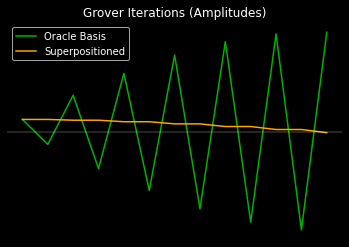

In [250]:
plt.plot(range(len(track)),(track[:,key_value]),c='lime',alpha=.7,label="Oracle Basis")
plt.plot(range(len(track)),(track[:,0]),c='orange',label="Superpositioned")
plt.axhline(0,alpha=.2)
plt.axis("off")
plt.title("Grover Iterations (Amplitudes)")
plt.legend()